In [34]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.pipeline import make_pipeline
Scen = 22
ori_da=pd.read_csv('%.0f_market_result.csv'%Scen)
data=pd.read_csv('%.0f_market_result2.csv'%Scen)
display(data)

,Unnamed: 0,operating cost
0,0,1.465999e+07
1,1000,1.417375e+07
2,2000,1.348379e+07
3,4000,1.274772e+07
4,8000,1.131740e+07
5,12000,1.019457e+07
6,16000,9.467836e+06
7,20000,8.719118e+06
8,24000,8.229957e+06
9,28000,7.844419e+06


In [35]:
x = data.iloc[:,0].values
y = data.iloc[:,1].values


In [36]:
x_plot = np.linspace(0,max(x),100)
X = x[:,np.newaxis]
X_plot = x_plot[:,np.newaxis]
base_line=ori_da.iloc[0][1]
model = make_pipeline(PolynomialFeatures(4),Ridge())
model.fit(X,y)
y_plot=model.predict(X_plot)

C:\Users\10290\Desktop\ZYX\conda\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=8.62576e-37): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


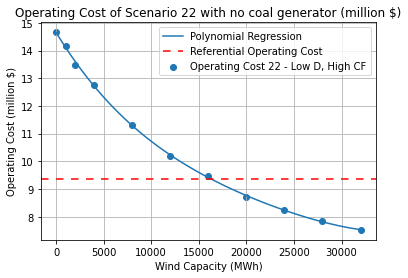

In [37]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.grid()
ax.set_xlabel("Wind Capacity (MWh)")
ax.set_ylabel(r"Operating Cost (million $)")
plt.scatter(x,y/1000000, label="Operating Cost %.0f - Low D, High CF"%Scen)

plt.plot(x_plot,y_plot/1000000,label='Polynomial Regression')
plt.title("Operating Cost of Scenario %.0f with no coal generator (million $)"%Scen)
plt.axhline(y=base_line/1000000, color='r', linestyle=(0, (5, 5)),label='Referential Operating Cost')
plt.legend()
plt.savefig("Scenario_%.0f_operating_cost(phaseout).jpg"%Scen, dpi = 800)

In [38]:
ridge= model.named_steps['ridge']
print(ridge.coef_)

[ 0.00000000e+00 -5.63819472e+02  2.19008385e-02 -5.38050239e-07
  5.84777674e-12]


In [39]:
from numpy.polynomial import Polynomial as P
p=P.fit(x,y,4)
(p-base_line).roots()

array([14141.65384292-31145.02226803j, 14141.65384292+31145.02226803j,
       16291.2250331     +0.j        , 47434.78951576    +0.j        ])